<a href="https://colab.research.google.com/github/devyanighildiyal/CodSoft_Task4/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CodSoft/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

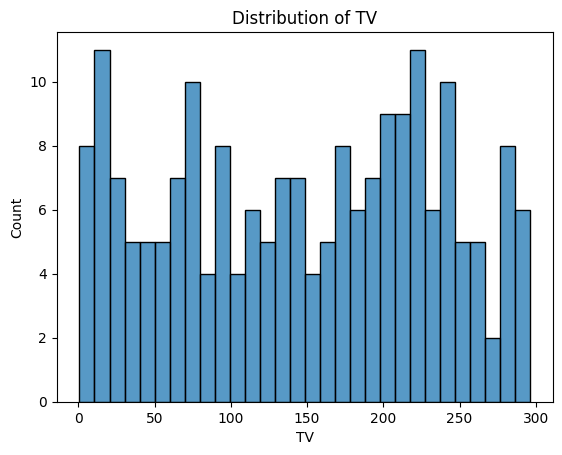

In [6]:
sns.histplot(data['TV'].dropna(), kde=False, bins=30)
plt.title('Distribution of TV')
plt.show()

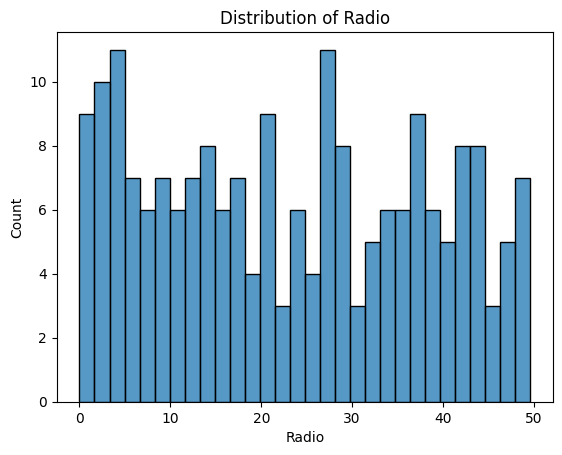

In [7]:
sns.histplot(data['Radio'].dropna(), kde=False, bins=30)
plt.title('Distribution of Radio')
plt.show()

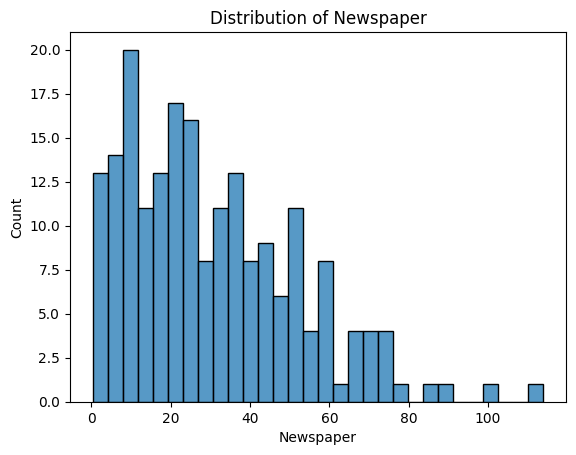

In [8]:
sns.histplot(data['Newspaper'].dropna(), kde=False, bins=30)
plt.title('Distribution of Newspaper')
plt.show()

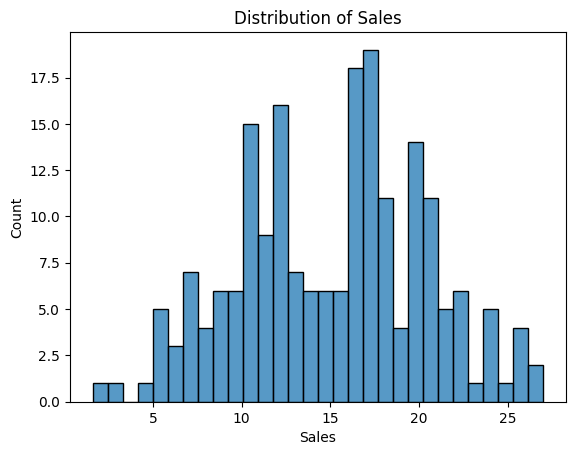

In [9]:
sns.histplot(data['Sales'].dropna(), kde=False, bins=30)
plt.title('Distribution of Sales')
plt.show()

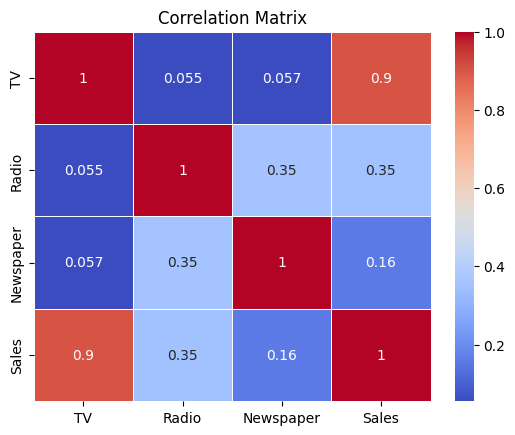

In [10]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
data.shape

(200, 4)

In [13]:
x_train.shape

(160, 3)

In [14]:
x_test.shape

(40, 3)

In [15]:
x_train_pred = model.predict(x_train)
x_train_pred

array([11.91465765, 15.32881375,  9.91093345,  9.46132618, 17.23412363,
        7.22972412, 10.35454191, 15.23876611, 11.14036535, 11.71856758,
       13.85060866, 14.66570876, 10.44983379,  9.28550764,  9.02357336,
       12.47875166, 10.48712079, 24.99748731,  7.88523289, 15.8640533 ,
       21.30888748, 17.00814942, 12.79206695,  9.84041429, 21.01070892,
        7.48343928, 23.52204082,  7.05636619, 12.56968457, 10.08676368,
       11.1715446 ,  9.12566707, 16.92180225, 17.90167068, 15.63428805,
       18.26514616, 15.51584207, 19.23176429, 17.48701831, 21.82555114,
       10.58560762, 14.22101675, 10.75778538, 18.10690693,  9.94580615,
       17.38762989, 13.21321157, 23.7057409 , 11.04124955, 23.50498043,
        7.25377772, 19.17388849, 24.9725586 , 21.21199698, 18.85730214,
       16.49383903, 13.90044002, 11.26132856, 19.58689909, 15.32197517,
       15.91287266, 10.29394498, 20.24916557, 12.59260311, 21.37507598,
       11.62060518,  9.00761916, 19.44123849, 15.85637182, 18.57

In [16]:
mse = mean_squared_error(y_train, x_train_pred)
mse

2.676142653782669

In [17]:
x_test_pred = model.predict(x_test)
x_test_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [18]:
mse = mean_squared_error(y_test, x_test_pred)
mse

2.9077569102710896

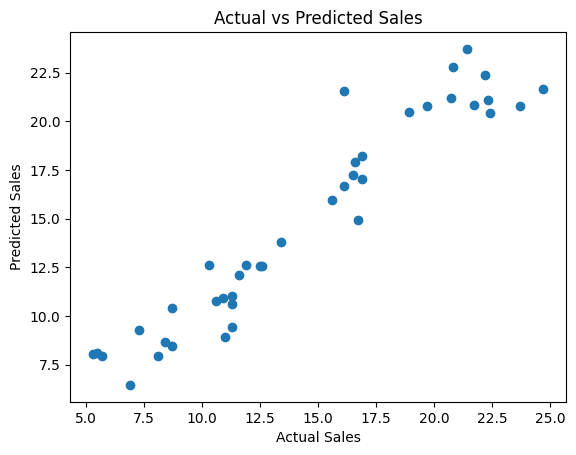

In [19]:
plt.scatter(y_test, x_test_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()